In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0532 - accuracy: 0.4615 - val_loss: 0.0425 - val_accuracy: 0.4416
Epoch 2/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0371 - accuracy: 0.4204 - val_loss: 0.0352 - val_accuracy: 0.4520
Epoch 3/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0307 - accuracy: 0.4391 - val_loss: 0.0307 - val_accuracy: 0.4479
Epoch 4/50
50000/50000 [==============================] - 83s 2ms/step - loss: 0.0284 - accuracy: 0.4412 - val_loss: 0.0290 - val_accuracy: 0.4457
Epoch 5/50
50000/50000 [==============================] - 86s 2ms/step - loss: 0.0270 - accuracy: 0.4450 - val_loss: 0.0266 - val_accuracy: 0.4494
Epoch 6/50
50000/50000 [==============================] - 86s 2ms/step - loss: 0.0260 - accuracy: 0.4476 - val_loss: 0.0244 - val_accuracy: 0.4532
Epoch 7/50
50000/50000 [==============================] - 87s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RSADM.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : dog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 3


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
31,5,dog,0.101529,0.000000,0.618300,0.271362,0.287793,0.188882,0.581895,0.000000,...,0.443874,0.035367,1.004331,0.851407,1.058883,0.682287,1.891990,1.821877,1.000000,1.192093e-07
3624,2,bird,0.672642,0.000000,0.616563,0.000000,0.065650,0.045779,0.169653,0.064948,...,0.650961,0.000000,0.520511,0.002464,0.587040,0.366818,1.229386,2.084413,0.931202,6.879771e-02
1099,2,bird,0.145466,0.000000,0.598774,0.099956,0.010453,0.121810,0.599342,0.328859,...,0.522011,0.000000,0.622977,0.131332,0.834005,0.440303,1.140762,1.486308,0.920786,7.921445e-02
2544,2,bird,0.256506,0.000000,0.354734,0.008745,0.000000,0.272172,0.007389,0.203468,...,1.016320,0.000000,0.819320,0.000000,0.783623,0.292172,1.737216,2.656180,0.919678,8.032233e-02
3748,5,dog,0.249948,0.000000,0.735538,0.379080,0.506104,0.076008,0.583125,0.000000,...,1.053509,0.000000,0.820747,1.360985,1.400023,1.474599,1.463318,1.539297,0.914999,8.500063e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,6,frog,0.000000,0.184112,1.124787,2.652929,2.987607,0.022521,0.000000,0.000000,...,0.609769,1.398281,2.009761,2.920059,2.765019,0.743263,1.741375,0.408776,0.494377,5.056226e-01
118,2,bird,0.000000,0.257306,1.264496,2.897286,3.300427,0.000000,0.000000,0.000000,...,0.699753,1.558379,1.794528,3.276613,3.107288,0.226526,0.058621,0.000000,0.481591,5.184093e-01
9765,4,deer,0.000000,0.259515,1.285283,2.939387,3.339237,0.000000,0.000000,0.000000,...,1.048581,1.480219,1.681167,2.709512,2.586887,0.861780,1.281255,0.441478,0.474133,5.258668e-01
1300,4,deer,0.000000,0.246672,1.218561,2.811478,3.220192,0.000000,0.000000,0.000000,...,0.579035,1.441310,1.396211,2.578408,2.398343,0.551213,0.540233,0.000000,0.462481,5.375194e-01


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

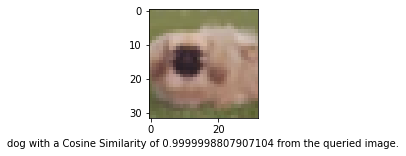

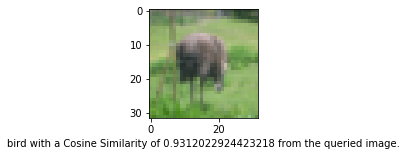

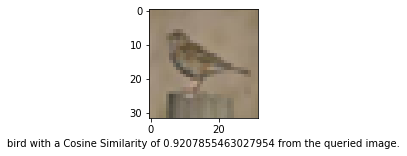

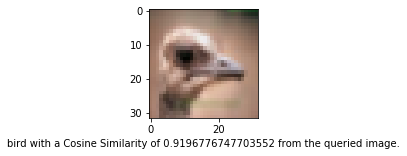

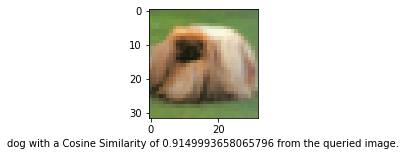

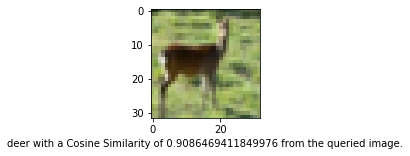

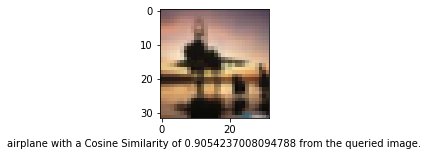

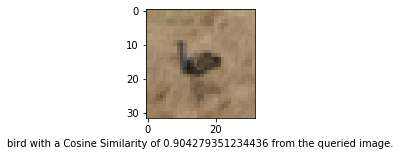

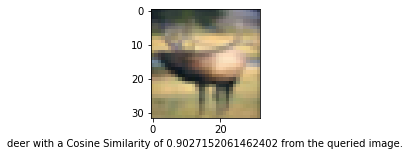

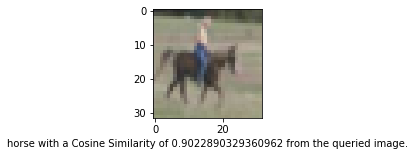

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
31,5,dog,0.101529,0.000000,0.618300,0.271362,0.287793,0.188882,0.581895,0.000000,...,0.035367,1.004331,0.851407,1.058883,0.682287,1.891990,1.821877,1.000000,1.192093e-07,0.000000
3624,2,bird,0.672642,0.000000,0.616563,0.000000,0.065650,0.045779,0.169653,0.064948,...,0.000000,0.520511,0.002464,0.587040,0.366818,1.229386,2.084413,0.931202,6.879771e-02,4.343259
6504,7,horse,0.824621,0.000000,0.865653,0.047566,0.000000,0.000000,0.129810,0.320033,...,0.000000,0.568199,0.000000,0.542753,0.499356,0.777790,2.494596,0.902289,9.771097e-02,5.118326
6768,2,bird,0.088322,0.000000,0.716518,0.000000,0.000000,0.000000,0.543908,0.546326,...,0.000000,0.735634,0.307812,0.753024,0.457607,1.207157,1.791302,0.904279,9.572065e-02,5.222666
2762,4,deer,0.687692,0.000000,0.554568,0.399083,0.694494,0.178803,0.073149,0.000000,...,0.206302,0.556437,0.381326,1.185964,0.529153,0.805712,0.813286,0.900561,9.943902e-02,5.238991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,3,cat,0.029049,0.000000,1.201431,2.263234,2.512151,0.080195,0.000000,0.000000,...,1.790192,1.731743,3.447333,2.853167,0.617747,0.000000,0.077534,0.636761,3.632390e-01,19.380055
8684,2,bird,2.752230,0.000000,1.876384,0.000000,0.078837,0.000000,0.000000,0.345527,...,1.600296,2.195724,3.440376,3.837489,0.812513,0.057820,0.000000,0.591564,4.084355e-01,19.585514
6234,7,horse,0.000000,0.258757,1.280162,2.928211,3.328514,0.000000,0.000000,0.000000,...,1.783448,2.496297,3.891048,3.880715,0.942849,0.000000,0.327033,0.611232,3.887677e-01,19.937649
6675,2,bird,0.218551,0.000000,0.716299,0.000000,0.000000,0.051192,0.305453,4.527141,...,0.000000,0.914550,0.000000,0.353650,1.508633,0.736282,7.680819,0.735971,2.640291e-01,20.303639


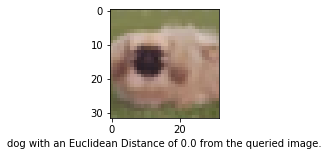

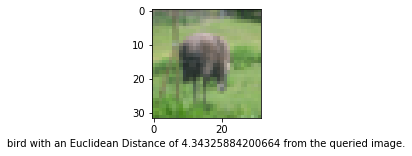

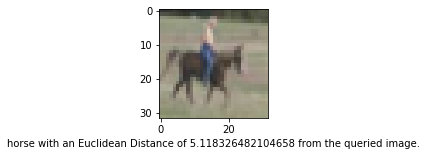

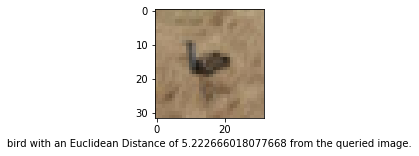

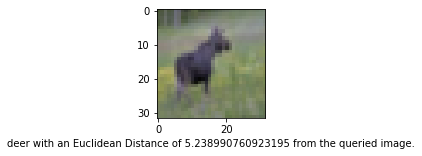

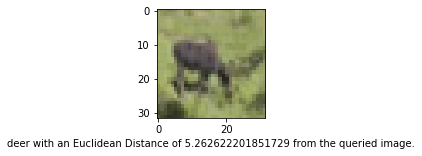

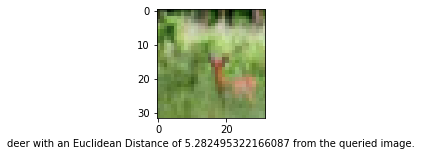

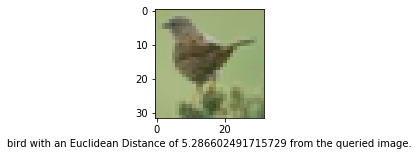

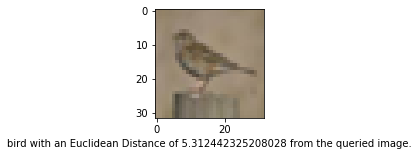

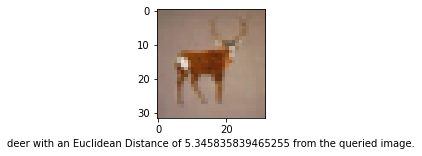

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()